In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




In [2]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [3]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="species").map({i: name for i, name in enumerate(iris.target_names)})

print("First 5 rows of dataset:")
print(X.head())
print("\nTarget classes:", y.unique())


First 5 rows of dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target classes: [np.str_('setosa') np.str_('versicolor') np.str_('virginica')]


In [4]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


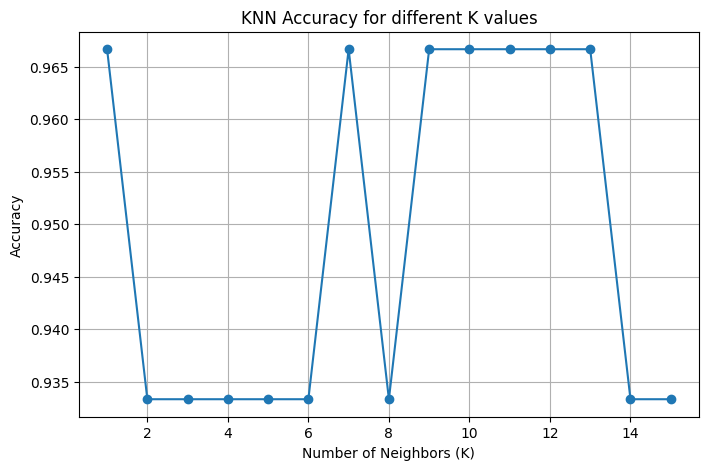

Best K value: 1 with accuracy: 0.9667


In [5]:
k_values = range(1, 16)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))


plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title("KNN Accuracy for different K values")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best K value: {best_k} with accuracy: {max(accuracy_scores):.4f}")

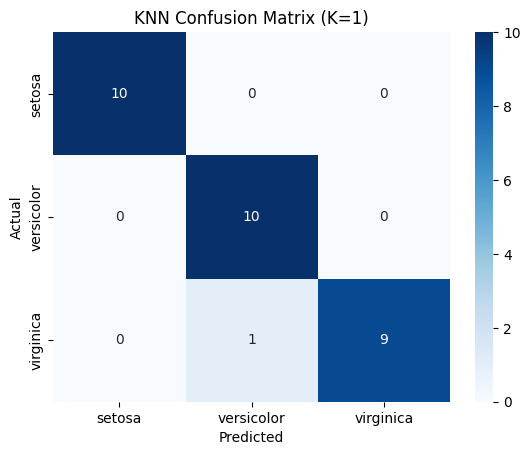


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [6]:
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best, labels=iris.target_names)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"KNN Confusion Matrix (K={best_k})")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

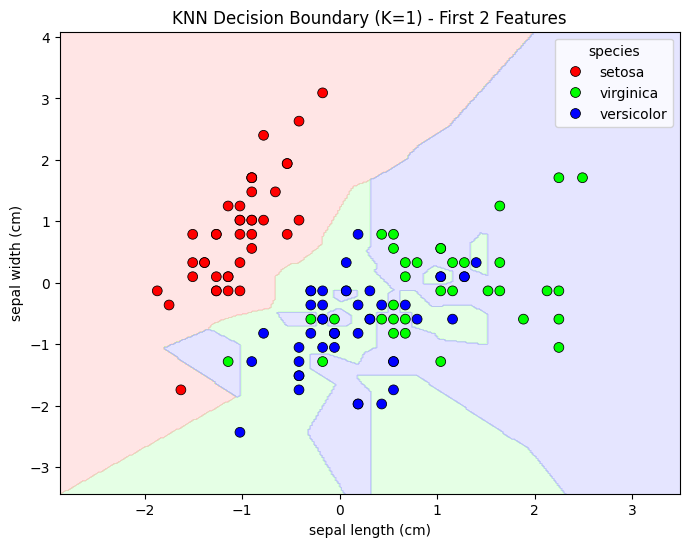

In [7]:
from matplotlib.colors import ListedColormap

X_2d = X_scaled[:, :2]
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_2d, y, test_size=0.2, random_state=42, stratify=y
)

knn_plot = KNeighborsClassifier(n_neighbors=best_k)
knn_plot.fit(X_train_2d, y_train_2d)

x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn_plot.predict(np.c_[xx.ravel(), yy.ravel()])
Z = pd.Categorical(Z, categories=iris.target_names).codes
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['#FF0000', '#00FF00', '#0000FF']

plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
sns.scatterplot(x=X_train_2d[:, 0], y=X_train_2d[:, 1], hue=y_train_2d,
                palette=cmap_bold, edgecolor='k', s=50)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title(f"KNN Decision Boundary (K={best_k}) - First 2 Features")
plt.show()